<a href="https://colab.research.google.com/github/rdgreene/CNN-Workshop/blob/master/CNN_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title <--- Run this to download data an initialise your environment
%%capture

import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
from skimage import io, transform

!git clone https://ronangreene@bitbucket.org/ronangreene/cats_vs_dogs.git # clone repository with cats and dogs images
!unzip cats_vs_dogs/data.zip # unzip data in clones repo
!rm -r cats_vs_dogs # remove zipped data

train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'



In [3]:
%tensorflow_version 2.x
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

keras.__version__

TensorFlow 2.x selected.


'2.2.4-tf'

In [0]:
target_size = 64

### Intro to Keras
Keras is a Python package for deep learning package that cuts through a lot of the nitty gritty of programming deep learning models. There are a few different ways to use keras, but we will be using it to make sequential models, where we add layers to the model one at a time. You can find all of the keras documentation [here](https://keras.io/).

In [152]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 2304)            

Next we want to use Keras' ImageDataGenerator object to feeding image data into own CNN direct from the image directory. We set up flows from two seperate directories, one containing training images, and the other containing validation images. The training images are used for directly training the model, while that validation images are used to evaluate how well the trained model generalises to images it did not see during training!

In [151]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) # TODO: move

# flow for training images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(target_size, target_size),
    batch_size=32,
    class_mode='binary'
    )

# flow for validation images
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(target_size, target_size),
    batch_size=32,
    class_mode='binary'
    )

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
import time

In [153]:
tic = time.time()

history = model.fit_generator(
      train_generator,
      epochs=20,
      validation_data=validation_generator,
  )

toc = time.time()
print((toc-tic)/60)

Epoch 1/20
50/50 [==============================] - 16s 322ms/step - loss: 0.6859 - accuracy: 0.5419 - val_loss: 0.7064 - val_accuracy: 0.4950
Epoch 2/20
50/50 [==============================] - 16s 310ms/step - loss: 0.6429 - accuracy: 0.6194 - val_loss: 0.6167 - val_accuracy: 0.6550
Epoch 3/20
50/50 [==============================] - 15s 308ms/step - loss: 0.5995 - accuracy: 0.6787 - val_loss: 0.6247 - val_accuracy: 0.6950
Epoch 4/20
50/50 [==============================] - 15s 307ms/step - loss: 0.5723 - accuracy: 0.7006 - val_loss: 0.6060 - val_accuracy: 0.6600
Epoch 5/20
50/50 [==============================] - 15s 304ms/step - loss: 0.5153 - accuracy: 0.7575 - val_loss: 0.6280 - val_accuracy: 0.6800
Epoch 6/20
50/50 [==============================] - 15s 305ms/step - loss: 0.4655 - accuracy: 0.7794 - val_loss: 0.5924 - val_accuracy: 0.7350
Epoch 7/20
50/50 [==============================] - 15s 308ms/step - loss: 0.4081 - accuracy: 0.8144 - val_loss: 0.6064 - val_accuracy: 0.7000

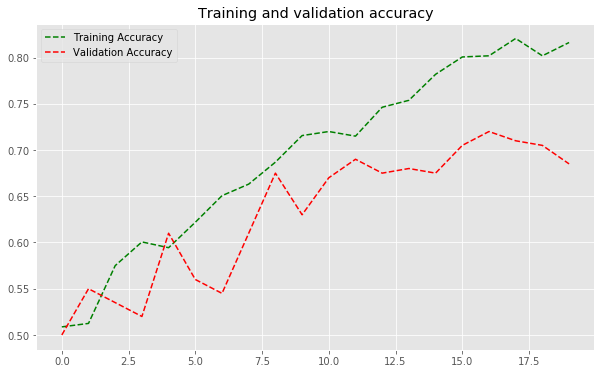

In [139]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(train_accuracy))
plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

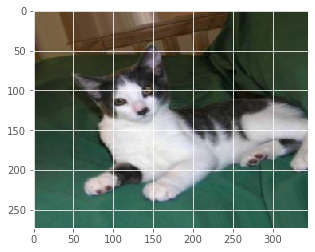

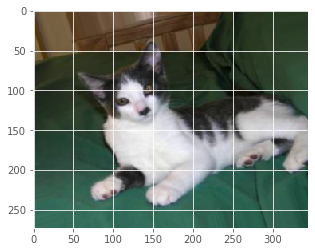

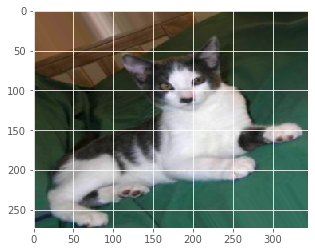

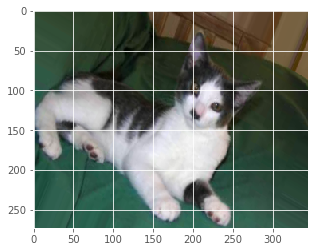

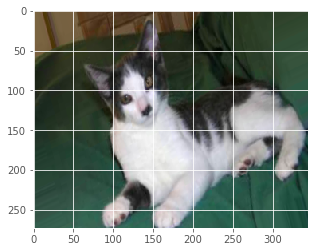

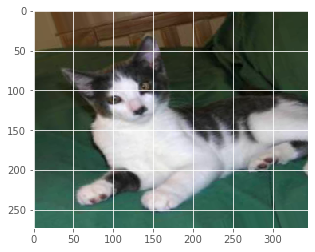

In [149]:
datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

img = image.load_img('data/train/cats/123.jpg')
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    if i > 4:
        break

plt.show()

In [150]:
# adding droput and image augmentation

aug_train_datagen = ImageDataGenerator(
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

aug_train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(target_size, target_size),
    batch_size=32,
    class_mode='binary'
    )

Found 1600 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate = 0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

In [146]:
tic = time.time()

history = model.fit_generator(
      aug_train_generator,
      epochs=40,
      validation_data=validation_generator,
  )

toc = time.time()
print((toc-tic)/60)

Epoch 1/20
50/50 [==============================] - 17s 343ms/step - loss: 0.6994 - accuracy: 0.4875 - val_loss: 0.6914 - val_accuracy: 0.5150
Epoch 2/20
50/50 [==============================] - 16s 328ms/step - loss: 0.6909 - accuracy: 0.5294 - val_loss: 0.6859 - val_accuracy: 0.5200
Epoch 3/20
50/50 [==============================] - 17s 331ms/step - loss: 0.6872 - accuracy: 0.5425 - val_loss: 0.6735 - val_accuracy: 0.5350
Epoch 4/20
50/50 [==============================] - 17s 338ms/step - loss: 0.6796 - accuracy: 0.5512 - val_loss: 0.6893 - val_accuracy: 0.5400
Epoch 5/20
50/50 [==============================] - 17s 332ms/step - loss: 0.6744 - accuracy: 0.5863 - val_loss: 0.6763 - val_accuracy: 0.5750
Epoch 6/20
50/50 [==============================] - 17s 334ms/step - loss: 0.6700 - accuracy: 0.5913 - val_loss: 0.6665 - val_accuracy: 0.5600
Epoch 7/20
50/50 [==============================] - 17s 333ms/step - loss: 0.6580 - accuracy: 0.6062 - val_loss: 0.6620 - val_accuracy: 0.6000

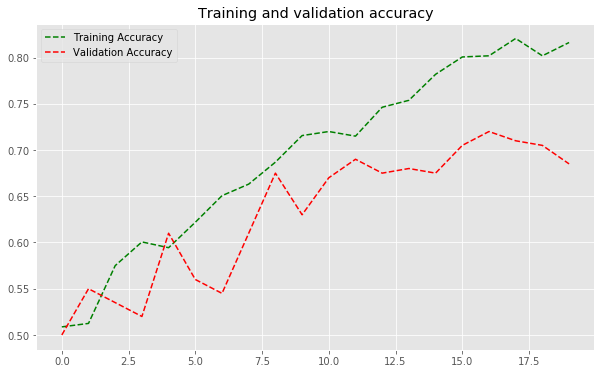

In [147]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(train_accuracy))
plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

### DEV AREA

In [39]:
import time
time.time()

1572782293.2272391

In [11]:

ls

cats_test  cats_train  cats_val  dogs_test  dogs_train	dogs_val


In [0]:
from skimage import io, transform
import numpy as np
import time

tic = time.time()

data = []
test_data = []

# get train and test data for cats
# for i, file in enumerate(cats):
#     try:
#         myimage = io.imread('data/cats/' + file).astype(np.float32)/255
#         myimage = transform.resize(myimage, (64, 64, 3))
#         if i < 950:
#           data.append((myimage, 1))
#         else:
#           test_data.append((myimage, 1))
#     except:
#         pass

# get train and test data for dogs
for i, file in enumerate(dogs):
    try:
        myimage = io.imread('data/dogs/' + file).astype(np.float32)/255
        myimage = transform.resize(myimage, (64, 64, 3))
        if i < 950:
          data.append((myimage, 1))
        else:
          test_data.append((myimage, 1))
    except:
        pass

print(time.time() - tic)



In [0]:
# build neural network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))